### Fraud Detection

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder

### Data Analysis and Preprocessing

#### Data Loading

In [2]:
print(os.getcwd())

/home/of/Documents/FraudDetect-AI


In [4]:
from scripts.fraud_detection import load_data
credit_card_data, fraud_data, ip_address_country = load_data('data/raw')

#### Verify The Loaded Dataset


#### Credit Card Data

In [5]:
credit_card_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Fraud Data

In [7]:
fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [8]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


#### Ip Address to Country


In [9]:
ip_address_country.head(10)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [10]:
ip_address_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Handle Missing Values

In [12]:
from scripts.fraud_detection import find_missing_values

#### Fing Missing Values Of Credit Card Data


In [13]:
find_missing_values(credit_card_data)

From 31 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Fing Missing Values Of Fraud Data


In [14]:
find_missing_values(fraud_data)

From 11 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Fing Missing Values Of Ip Address to Country Data


In [15]:
find_missing_values(ip_address_country)

From 3 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Data Cleaning


In [16]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_address_country['lower_bound_ip_address'] = ip_address_country['lower_bound_ip_address'].astype(int)


#### Exploratory Data Analysis (EDA)


#### Univariate analysis


##### Univariate analysis for credit card data


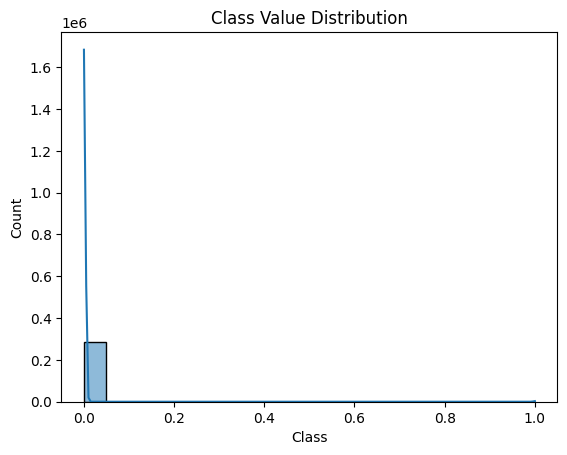

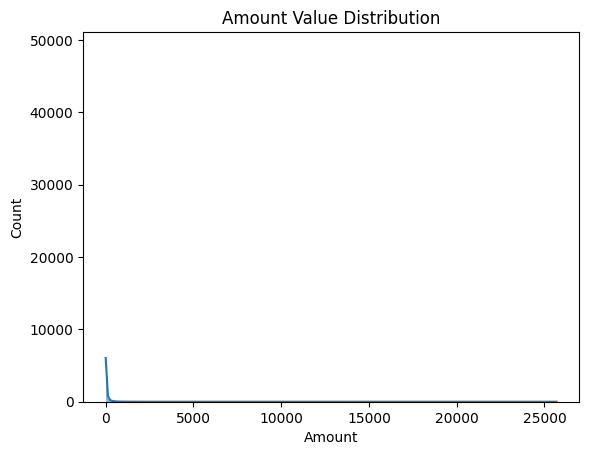

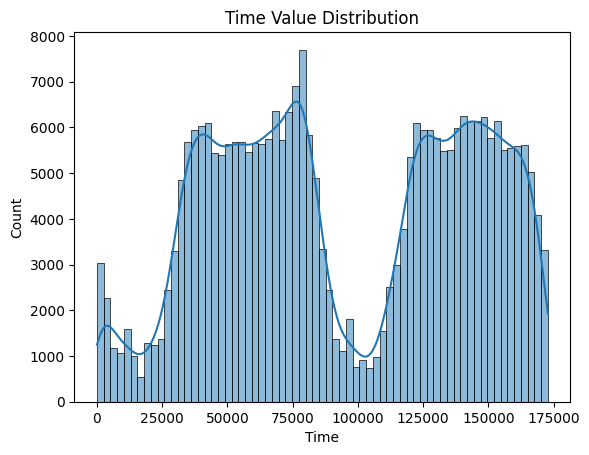

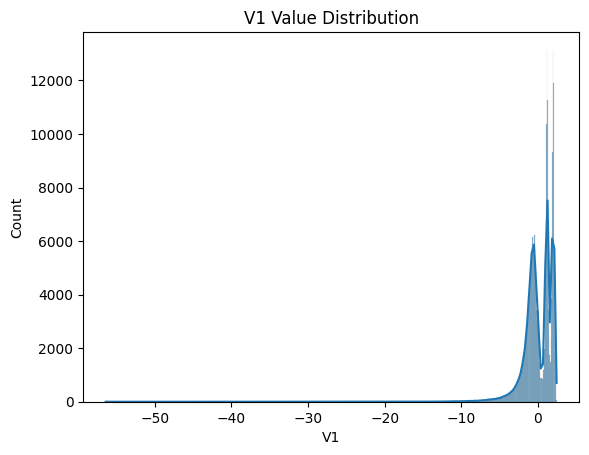

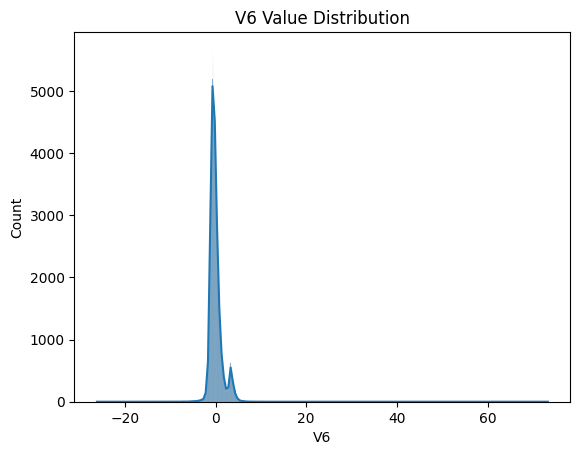

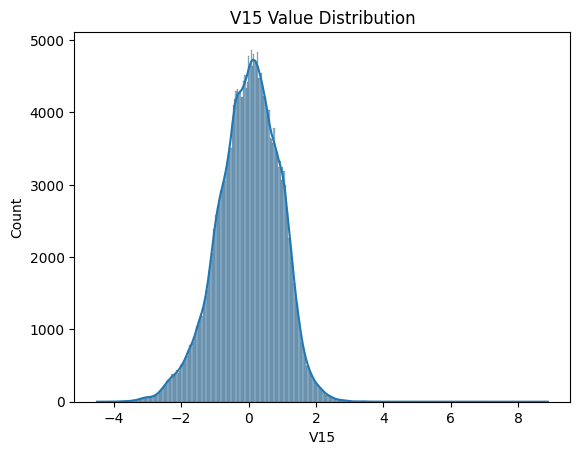

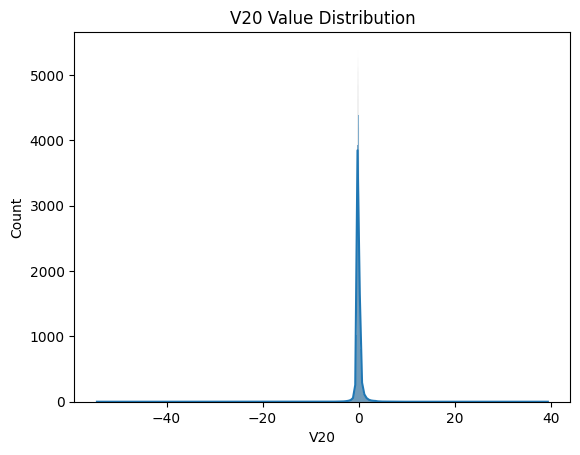

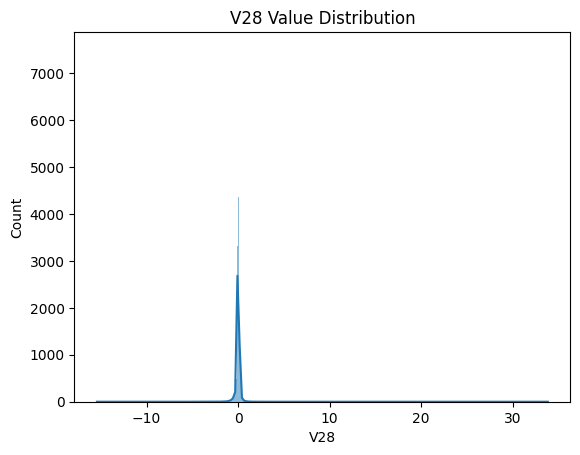

In [17]:
credit_card_data_columns = ['Class','Amount','Time','V1','V6','V15','V20','V28']
from scripts.fraud_detection import univariate_analysis
univariate_analysis(credit_card_data,credit_card_data_columns)

#### Univariate analysis for fraud data


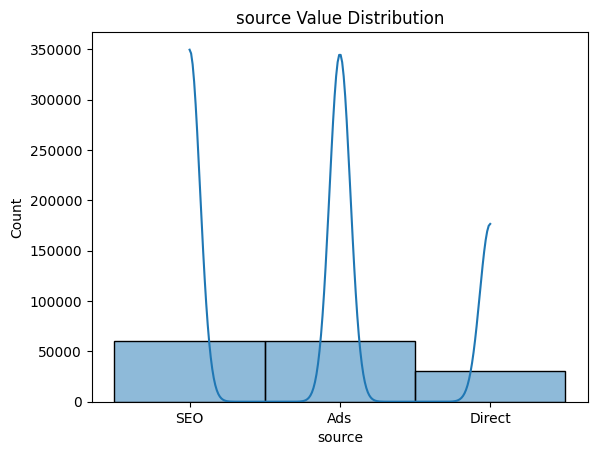

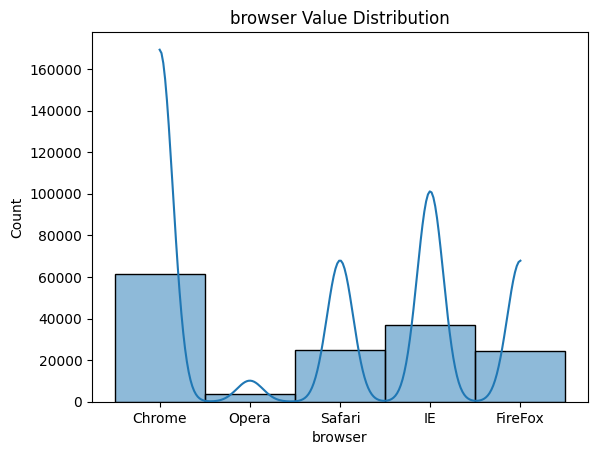

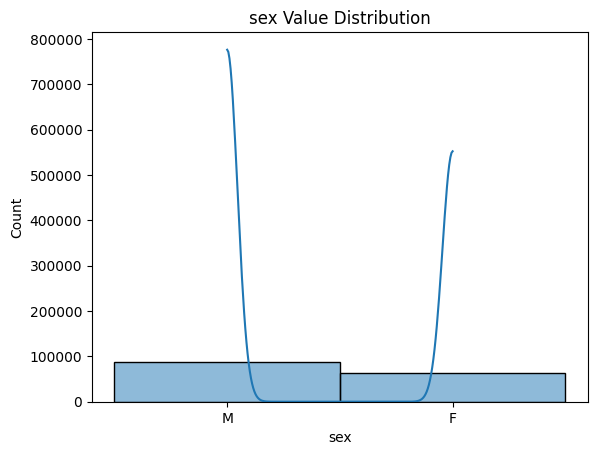

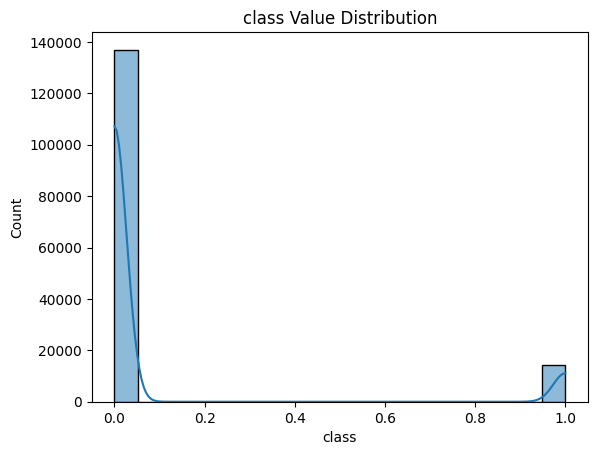

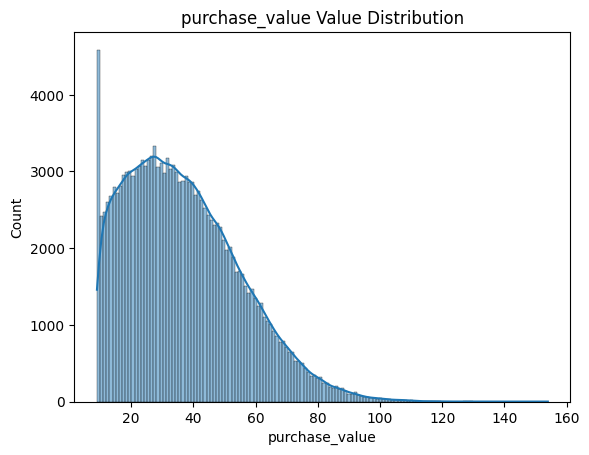

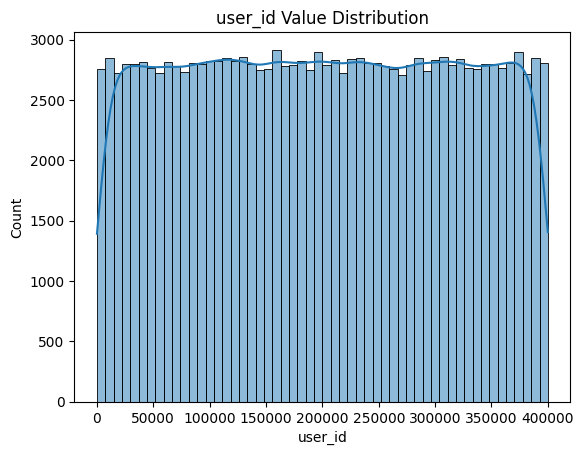

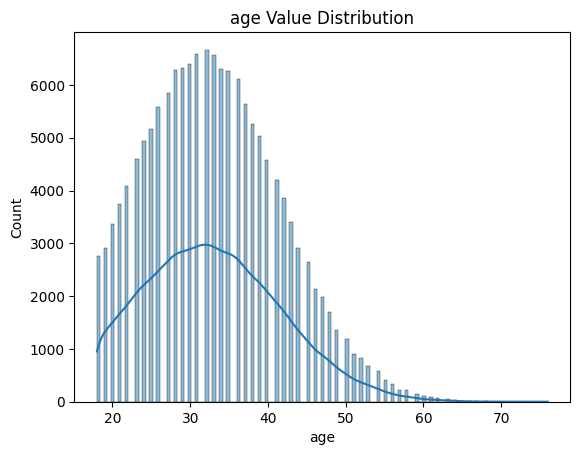

In [18]:
columns_fraud_data=['source','browser','sex','class','purchase_value','user_id','age']
univariate_analysis(fraud_data,columns_fraud_data)

#### Univariate analysis of ip address to country data

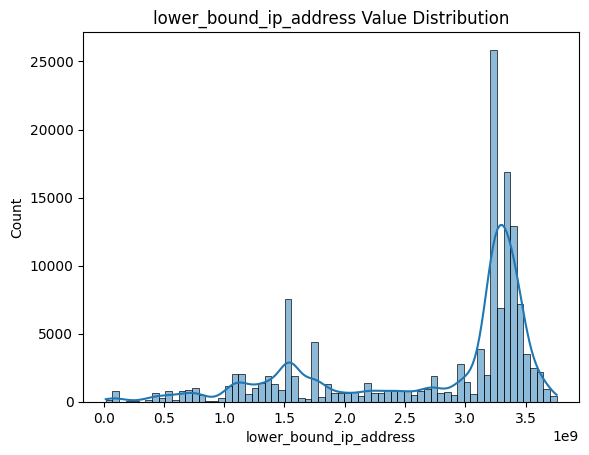

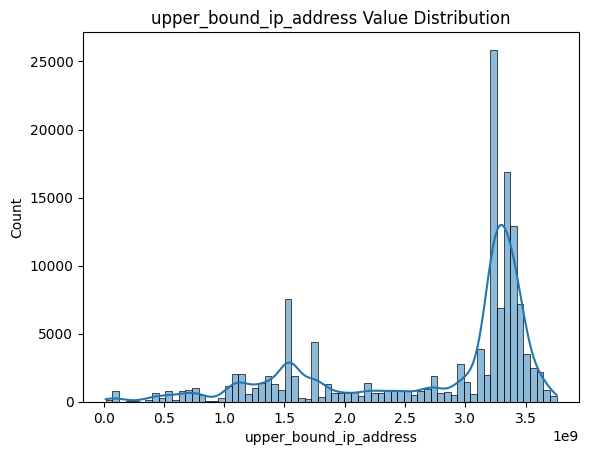

In [19]:
ip_address_country_columns = ['lower_bound_ip_address','upper_bound_ip_address']
univariate_analysis(ip_address_country,ip_address_country_columns)

#### Bivariate Analysis


#### Bivariate analysis of fraud data


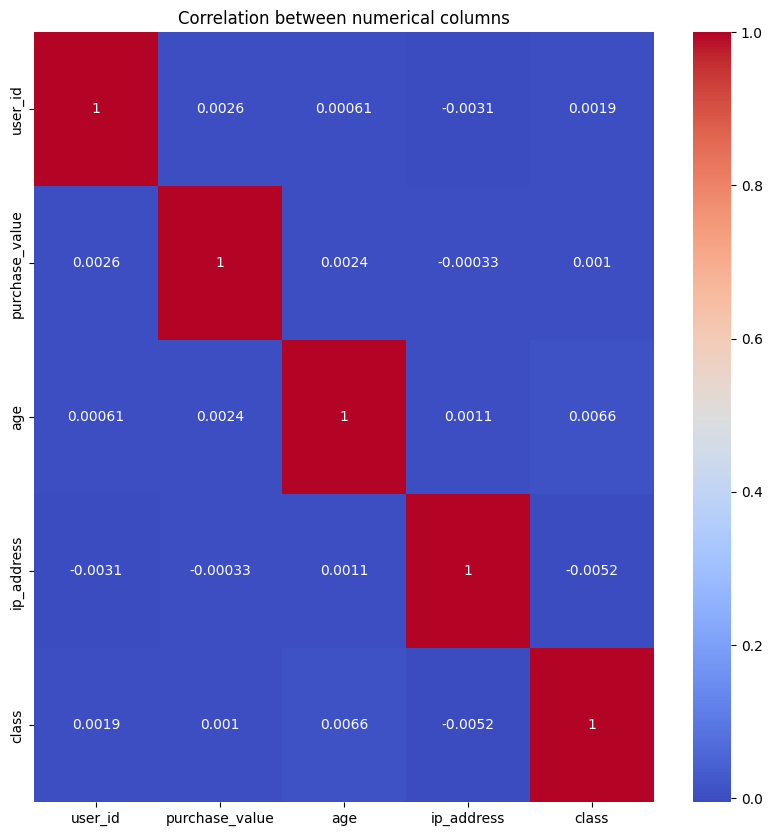

In [20]:
numerical_fraud_data= fraud_data.select_dtypes(include='number')
from scripts.fraud_detection import bivariate_analysis
bivariate_analysis(numerical_fraud_data)

#### Bivariate analysis of credit card data


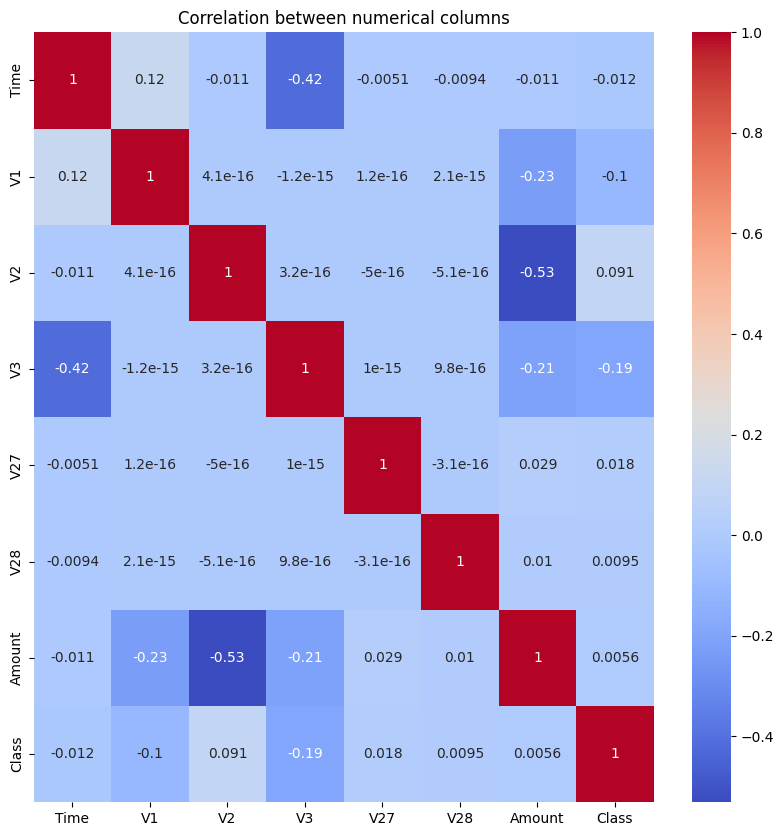

In [21]:
credit_card_data_corr = credit_card_data.drop(['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26'], inplace=False, axis=1)
bivariate_analysis(credit_card_data_corr)

#### Merge Datasets for Geolocation Analysis


In [22]:
from scripts.fraud_detection import merge_fraud_ip_address_data
merged_fraud_data = merge_fraud_ip_address_data(fraud_data,ip_address_country)

In [23]:
merged_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [25]:
merged_fraud_data.to_csv('data/raw/merged_fraud_data.csv',index=False)

In [26]:
merged_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


#### Feature Engineering


##### Calculate Transaction Frequency and Velocity


In [27]:
merged_fraud_data['purchase_time'] = pd.to_datetime(merged_fraud_data['purchase_time'])

In [28]:
transaction_frequency = merged_fraud_data.groupby('device_id').size().reset_index(name='transaction_frequency')
merged_fraud_data = merged_fraud_data.merge(transaction_frequency, on='device_id')

In [29]:
merged_fraud_data = merged_fraud_data.sort_values(by=['user_id', 'purchase_time'])
merged_fraud_data['transaction_velocity'] = merged_fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)


#### Time-based features


In [30]:
merged_fraud_data['hour_of_day'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.hour
merged_fraud_data['day_of_week'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.dayofweek

In [31]:
merged_fraud_data.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
53346,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,1.549271e+09,1.549795e+09,France,1,0.0,7,2
94166,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,2.755330e+09,2.755396e+09,Germany,1,0.0,7,3
127114,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,3.701441e+09,3.701473e+09,Japan,1,0.0,23,4
118057,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,3.454697e+09,3.454730e+09,United States,1,0.0,20,2
41156,400000,2015-03-16 23:03:56,2015-04-20 06:27:52,58,ACINFPOJYYUAW,Ads,Chrome,M,25,1217910956,1,1.217397e+09,1.218445e+09,United States,1,0.0,6,0
